In [1]:
import tweepy
import re
import pickle
from tweepy import OAuthHandler
import numbers
import re
import pickle
import nltk
from nltk.corpus import stopwords



In [4]:
consumer_key = "J7P3Q6Q0Rj8haRg9hLTcMvXOC"
consumer_secret = "50HD93XeysWb0XBA5qOowjBsPBUkmxZzLj4K6TfnfAIZ7WchvT"
access_token = "3283362782-mcSN3dklM5nO40o2PHHO0053ljvRhUn9WxHeMRo"
access_secret = "m8wEtPy35GMOzy30PkCQR2fewwcTFrXxfonCbgL0DilVc"

In [5]:
from tweepy.auth import OAuthHandler
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [6]:
args = ['facebook']
api = tweepy.API(auth,timeout=10)
api

In [7]:
list_tweets = []
query = args[0]
len(args)

1

In [9]:
if len(args)==1:
    for status in tweepy.Cursor(api.search, q=query+" -filter:retweets",lang='en',result_type="recent").items(100):
        list_tweets.append(status.text)
 

Status(_api=<tweepy.api.API object at 0x121cec0f0>, _json={'created_at': 'Wed Jun 12 08:01:20 +0000 2019', 'id': 1138717909390450688, 'id_str': '1138717909390450688', 'text': 'I find it odd that some people critique Facebook loudly on new sites, yet continue to use it. Hypocrisy much? #DeleteFacebook', 'truncated': False, 'entities': {'hashtags': [{'text': 'DeleteFacebook', 'indices': [110, 125]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://choqok.kde.org/" rel="nofollow">Choqok</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 44207412, 'id_str': '44207412', 'name': 'Miro Collas', 'screen_name': 'MiroCollas', 'location': 'USA', 'description': 'Tweeting and RTing stuff of interest. RTs do not imply agreement.', 'url': None, 'entities': {'description': {'urls'

In [10]:
list_tweets[0:10]

['@JKgrievance Few days back this happened in Akhnoor. We are getting power less than 12 hours a day and that too wit… https://t.co/AZBkx4r8EN',
 'Tonight we are on https://t.co/uOOLuKGa7J',
 '@GillPrincePhoto Hi I can’t see the group “Photography in Milton Keynes” on Facebook.',
 'My new best friend is the studio director of @Vertigo_Games, great night at the Facebook gaming party.',
 'As u got some free time please try to do" Facebook live session" for ur "Jaaan o jigrz"\nWe all have been waiting fo… https://t.co/ABTTgkk6eD',
 'In August 2013, it all began with an all consuming frustration to provide value-for-money, ethically &amp; responsibly,… https://t.co/O3HuIck6H5',
 '@itstommyinnit @AFL Also the BetEasy sponsored show you publish on Facebook with Campbell Brown and Wayne Carey tal… https://t.co/Z1AtgkndWs',
 'Update June 12, 2019\nAnnouncing the tech support automatic reply system and new WP plugins automatic patching. Bugf… https://t.co/9R1qpjxcSH',
 'Check out the June issue

In [12]:
from sklearn.datasets import load_files
with open('/Users/ashishgyawali/tfidfmodel.pickle','rb') as f:
    vectorizer = pickle.load(f)

In [13]:
with open('/Users/ashishgyawali/clasifier.pickle','rb') as f:
    clf = pickle.load(f)

In [32]:
clf.predict(vectorizer.transform(['I am bad']))
total_pos = 0
total_neg = 0

In [34]:
#preprocessing
for tweet in list_tweets:
    tweet = re.sub(r'^https://t.co/[a-z0-9A-Z]',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-z0-9A-Z]*\s',' ',tweet)
    tweet = re.sub(r'\s+https://t.co/[a-z0-9A-Z]*$',' ',tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r'\W',' ',tweet)
    tweet = re.sub(r'\d',' ',tweet)
    tweet = re.sub(r's+[a-z]\s',' ',tweet)
    tweet = re.sub(r'^[a-z]\s+',' ',tweet)
    tweet = re.sub(r'\s+[a-z]$',' ',tweet)
    tweet = re.sub(r'\s+',' ',tweet)
    sent = clf.predict(vectorizer.transform([tweet]).toarray())
    print(tweet,":",sent)
    if sent[0] == 1:
        total_pos += 1
    else:
        total_neg += 1

 jkgrievance few days back this happened in akhnoor we are getting power le than hours a day and that too wit  : [1]
tonight we are on  : [1]
 gillprincephoto hi i can t see the group photography in milton keynes on facebook  : [1]
my new be friend is the studio director of vertigo_games great night at the facebook gaming party  : [1]
as u got some free time plea try to do facebook live session for ur jaaan o jigrz we all have been waiting fo  : [0]
in augu it all began with an all consuming frustration to provide value for money ethically amp responsibly  : [1]
 itstommyinnit afl al the betea sponsored show you publi on facebook with campbell brown and wayne carey tal  : [1]
update june announcing the tech support automatic reply system and new wp plugins automatic patching bugf  : [1]
check out the june issue of the fabulous celtic life magazine for my article which asks do we really need celtic  : [1]
 why is nancy pelo ignoring facebook ceo mark zuckerberg via fox news  : [1]
 face

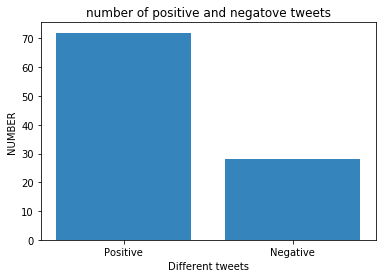

In [44]:
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))
plt.bar(y_pos,[total_pos,total_neg],alpha=0.9)
plt.xticks(y_pos,objects)
plt.xlabel("Different tweets")
plt.ylabel('NUMBER')
plt.title("number of positive and negatove tweets")

plt.show()

In [31]:
#plot
clf.predict(vectorizer.transform(["lets live seperately"]))


array([1])